### 🌈 1-Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?

There are two things that explain why Linear Regression is not suitable for classification. The first one is that Linear Regression deals with continuous values whereas classification problems mandate discrete values.
The second problem is regarding the shift in threshold value when new data points are added. 
Like logistic regression, it can quickly learn a linear separation in feature space for two-class classification tasks
A perceptron is an algorithm for supervised learning and it's used as binary classifier like logistic regression but the main difference that perceptron using step activation function. both logistic regression and preceptron are better than linear regression in classification task.


**🌈2-What's a decision tree and how it is different to a logistic regression model?**

Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two. Of course for higher-dimensional data, these lines would generalize to planes and hyperplanes.
A decision tree is a sort of supervised machine learning that categorizes or predicts outcomes based on the answers to a previous set of questions.
, and consists of

Root node,

Splitting,

Branch,

Decision node,

Leaf node.

The difference between decision tree and logistic regression is that logistic regression assumes that the data is linearly separable in space, whereas decision tree is a non-linear classifier; it doesn't not require data to be linearly separable, another difference that categorical data works well with decision tree, while continuous data work well with logistic regression.

### 🌈3-What's the difference between grid search and random search?

The key difference from grid search is in random search, not all the values are tested and values tested are selected at random.
the grid search for the best combination from all hyperparameter combinations, every combination of hyperparameter values is tried which can be very inefficient and it will take a long time to execute
random search sets up a grid of hyperparameter values and searches for random combinations to train the model and score, it will not find the best hyperparameter as grid search do, but it's faster than grid search.

### 🌈4-What's the difference between bayesian search and random search?

Unlike the grid search and random search, which treat hyperparameter sets independently, the Bayesian optimization is an informed search method, meaning that it learns from previous iterations. The number of trials in this approach is determined by the user.
bayesian search is performing better than random search in finding best hyperparameters and it's faster than grid search.

### problem formulation

### problem definition
our problem here is that we want to build a machine learning model to predict the probability (0-1, float) (output) that the dating session will lead to a successful match. based on participants' information such as gender, income level, main home, personality characteristics (inputs), etc
(191 features) for both training set (5909 observations) and test set (2469 observations) as inputs

(1 feature) for train set (5909 observations) as output.

## Data mining function
classification & prediction
## Model impact
It will act as a recommender to get people to meet their suitable partners in speed dating events.
## The ideal solution
Using a gradient boosting classifier with random search to search for the best hyperparameters combinations to get better ROC-AUC result (88.184%) late submission, it takes a reasonable amount of time in searching, but you need to build a suitable search space based on your resources and you can improve the ROC-AUC result by increasing hyperparameters search space.

### Experimental protocol

 **Data exploration**
 **Data preprocessing**
deal with some known columns (replace null values- convert datatypes of these columns- drop some unimportant columns- convert one column to OHE columns)
building a pipeline which will do some preprocessing on the rest of the features.
applying knn imputer to impute missing values from these columns that I didn't preprocess manually.
applying standard scaling on all columns since after I finished all manual preprocessing all columns in the dataset are numeric features.
 **Building model** (Build another 3 pipelines and pass preprocessing pipeline to each one of them.)
 
** creating search spaces**  (grid, bayesian and random)

**Start training each model ** many times with many hyperparameters from search space and choose the best

**Start predicting the test data**

### Data preparation 

In [ ]:
#import the libraries which we will use to see the data then read the train and test data:
import pandas as pd
import matplotlib.pyplot as plt #for graphs 
import seaborn as sns
train = pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

i intend to merge the train and test data to make preprocessing fro both of them and then split them 
as match is the target so without see the data it will not be in the test data 
so i check if there is null values "missing values" as if there will not be i can drop it and at the end of preprocessing i conactenate it with train data

In [ ]:
#chech if there is a null values :
train["match"].isnull().sum() 

0

In [ ]:
#copy the match feature to another separate column:
col_match = train["match"].copy()

In [ ]:
#now drop the match feature from train data:
train.drop('match',axis=1,inplace=True)

In [ ]:
#merge two data in one dataframe :
frames = [train, test]
df = pd.concat(frames,ignore_index=True)
df

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,0,23,2,15,19,18,18.0,14,11,407.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7982
8374,0,5,1,13,9,4,4.0,4,8,339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7299
8375,1,26,2,2,19,3,NaN,15,3,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1818
8376,0,19,2,9,20,11,11.0,9,2,215.0,...,7.0,12.0,12.0,9.0,NaN,NaN,NaN,NaN,NaN,937


In [ ]:
# missing values per-column 
total = df.isnull().sum().sort_values(ascending=False)
total

num_in_3    7710
numdat_3    6882
expnum      6578
amb7_2      6423
sinc7_2     6423
            ... 
position       0
round          0
wave           0
condtn         0
id             0
Length: 191, dtype: int64

In [ ]:
# missing values percentage per-column
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
percent

num_in_3    0.920267
numdat_3    0.821437
expnum      0.785152
amb7_2      0.766651
sinc7_2     0.766651
              ...   
position    0.000000
round       0.000000
wave        0.000000
condtn      0.000000
id          0.000000
Length: 191, dtype: float64

,Total,Percent
num_in_3,7710,0.920267
numdat_3,6882,0.821437
expnum,6578,0.785152
amb7_2,6423,0.766651
sinc7_2,6423,0.766651
...,...,...
position,0,0.000000
round,0,0.000000
wave,0,0.000000
condtn,0,0.000000


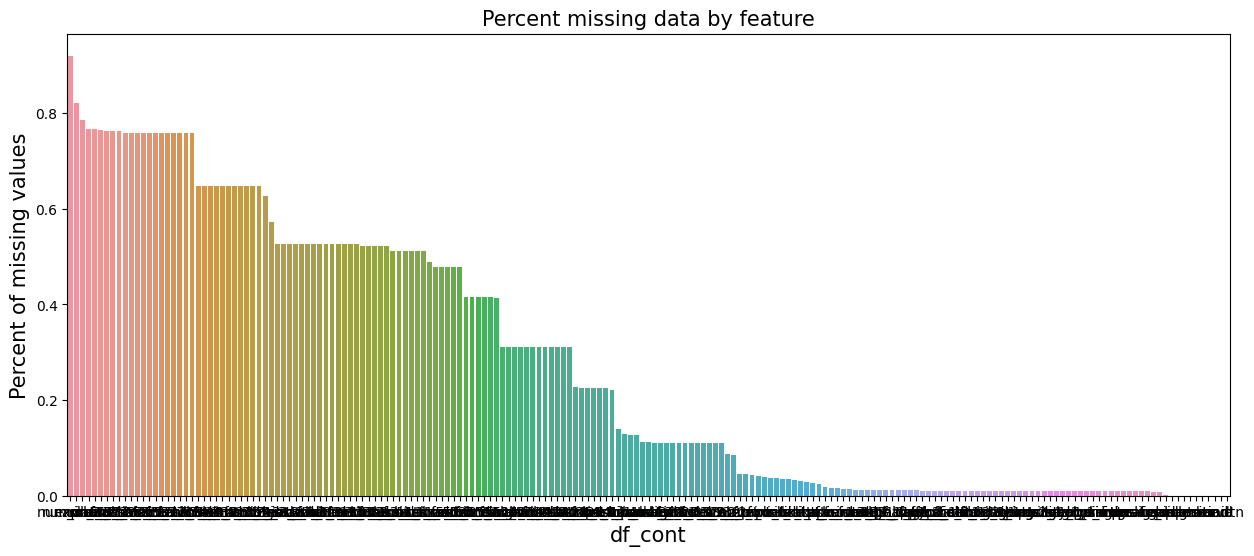

In [ ]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='horizontal')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [ ]:
# i noticed that there is many null values so i will drop columns which has more than 70% of null values :
df1 = df.loc[:, train.isnull().mean() < .7]

In [ ]:
# missing values percentage per-column
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
percent

attr2_3     0.646813
intel2_3    0.646813
attr4_3     0.646813
sinc4_3     0.646813
intel4_3    0.646813
              ...   
position    0.000000
round       0.000000
wave        0.000000
condtn      0.000000
id          0.000000
Length: 170, dtype: float64

In [ ]:
#to select the object features:
df1.select_dtypes(include =['object'])

,field,undergra,mn_sat,tuition,from,zipcode,income,career
0,Ed.D. in higher education policy at TC,University of Michigan-Ann Arbor,"1,290.00","21,645.00","Palo Alto, CA",NaN,NaN,University President
1,Engineering,NaN,NaN,NaN,"Boston, MA","2,021",NaN,Engineer or iBanker or consultant
2,Urban Planning,"Rizvi College of Architecture, Bombay University",NaN,NaN,"Bombay, India",NaN,NaN,Real Estate Consulting
3,International Affairs,NaN,NaN,NaN,"Washington, DC","10,471","45,300.00",public service
4,Business,Harvard College,"1,400.00","26,019.00",Midwest USA,"66,208","46,138.00",undecided
...,...,...,...,...,...,...,...,...
8373,Neuroscience and Education,Columbia,"1,430.00","26,908.00",Hong Kong,0,NaN,Academic
8374,School Psychology,Bucknell University,"1,290.00","25,335.00","Erie, PA",NaN,NaN,school psychologist
8375,Law,NaN,NaN,NaN,Brooklyn,"11,204","26,482.00",Intellectual Property Attorney
8376,Mathematics,NaN,NaN,NaN,Vestal,"13,850","42,640.00",college professor


In [ ]:
#i droped the features that we didnt use them as there are features have the same perpose :
df1.drop(['field','zipcode','career'],axis=1,inplace=True)

<ipython-input-45-8b8296b392a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(['field','zipcode','career'],axis=1,inplace=True)


In [ ]:
#convert the object features to category : 
df1['from'] = df1['from'].astype("category")

<ipython-input-46-d4ec6b4a38ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['from'] = df1['from'].astype("category")


In [ ]:
df1['income'] = df1['income'].astype("category")

<ipython-input-47-93b70abaa369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['income'] = df1['income'].astype("category")


In [ ]:
df1['undergra'] = df1['undergra'].astype("category")

<ipython-input-48-3264c5393f3d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['undergra'] = df1['undergra'].astype("category")


In [ ]:
#split two dataframes:
#X_train split
train_splitted = df1.iloc[:train.shape[0],:]

#split X_test
test_splitted = df1.iloc[train.shape[0]:,:]

In [ ]:

train_splitted.shape

(5909, 167)

In [ ]:
test_splitted.shape

(2469, 167)

In [ ]:
#concatenate the match colmn to train data:
train_splitted = pd.concat([train_splitted,col_match],axis=1)

In [ ]:
train_splitted.shape

(5909, 168)

In [ ]:
# now we can split the data
import numpy as np
from sklearn.model_selection import train_test_split

y = train_splitted['match'] # lower case for vector
X = train_splitted.drop('match', axis=1) # upper case for matrix
print('original shape', X.shape, y.shape)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.33, random_state=42)



original shape (5909, 167) (5909,)


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 167 entries, gender to id
dtypes: category(3), float64(152), int64(10), object(2)
memory usage: 10.6+ MB


### A Tunable Pipeline

Pipelines are a simple way to keep your data preprocessing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.                         
Step 1: Define Preprocessing Steps ,
Step 2: Define the Model,
Step 3: Create and Evaluate the Pipeline

In [ ]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the df2.info() output )
features_numeric = list(df1.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the df2.info() output )
features_categorical = list(df1.select_dtypes(include=['category']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'attr1_s', 'sinc1_s', 'in

In [ ]:
#import the libraries that we will use in pipline and model :
import numpy as np
from sklearn.compose import ColumnTransformer #we use the ColumnTransformer class to bundle together different preprocessing steps.
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer #fill missing falues 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', 
           RandomForestClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc_o', 'intel_o', 'fun_o',
                                                   'amb_o', 'shar_o', 'like_o',
                                                   'prob_o', 'met_o', 'age', ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['undergra', 'from',
                                                   'income'])])),
                ('my_classifier', RandomForestClassifier())])

In [ ]:
# The pipeline object can be used like any sk-learn model
full_pipline = full_pipline.fit(X_train, y_train)
full_pipline.predict(test_splitted)

array([0, 0, 0, ..., 0, 0, 0])

### Grid Search with Cross-validation

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 40],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 20, 30]       
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.8224079536232336
best score {'my_classifier__max_depth': 10, 'my_classifier__n_estimators': 30, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search.predict(test_splitted)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_search.predict_proba(test_splitted)[:,1]

submission.to_csv('sample_submission_walkthrough1.csv', index=False)

After using grid search with cross validation and the algorithm is randomforest the accuracy is .82 so we can try another algorethim

### with XGBoost algorithm 

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', XGBClassifier(),
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [100,700,900],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
   # 'my_classifier__max_depth':[5, 8, 10],
    'my_classifier__learning_rate' :[.01,0.02,.03]    
}

# cv=2 means two-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=2, verbose=1, n_jobs=2, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 2 folds for each of 9 candidates, totalling 18 fits
best score 0.8599750808480178
best score {'my_classifier__learning_rate': 0.01, 'my_classifier__n_estimators': 700, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_search.predict_proba(test_splitted)[:,1]

submission.to_csv('sample_submission_walkthrough2.csv', index=False)

### Grid Search with validation set
### Cross-validation is expensive. We can supply our own validation set

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import PredefinedSplit

# Further split the original training set to a train and a validation set
X_train2, X_val, y_train2, y_val = train_test_split(
    X_train, y_train, train_size = 0.8, stratify = y_train, random_state = 2022)

# Create a list where train data indices are -1 and validation data indices are 0
# X_train2 (new training set), X_train
split_index = [-1 if x in X_train2.index else 0 for x in X_train.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

grid_search = GridSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    scoring='roc_auc')

# here we still use X_train; but the grid search model
# will use our predefined split internally to determine 
# which sample belongs to the validation set
grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 9 candidates, totalling 9 fits
best score 0.8686171712046903
best score {'my_classifier__learning_rate': 0.03, 'my_classifier__n_estimators': 900, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_search.predict_proba(test_splitted)[:,1]

submission.to_csv('sample_submission_walkthrough3.csv', index=False)

### Random Search
### Grid search (global optimal) is expensive when you specify a large search space. Alternatively, random search CV give you local optimal (may be good enough and even more generalizable)

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

grid_search = RandomizedSearchCV(
    full_pipline, param_grid, cv=pds, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=10,
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 9 candidates, totalling 9 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


best score 0.8686171712046903
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 900, 'my_classifier__learning_rate': 0.03}


the best accuracy by random search 

In [ ]:
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_search.predict_proba(test_splitted)[:,1]

submission.to_csv('sample_submission_walkthrough4.csv', index=False)

### Bayesian Search
### We can interpret the hyperparameter search problem as a non-differentiable optimization problem, and use bayesian learning to predict what is the next hyperparamter values we should try given the current trials.

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 4.0 MB/s eta 0:00:00


In [ ]:
# Let's try this with SVM model
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=3,
    random_state=0,
    verbose=1,
    # we still use 
    cv=pds,
)

bayes_search.fit(X_train, y_train)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))

Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
Fitting 1 folds for each of 1 candidates, totalling 1 fits
best score 0.8333333333333334
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


In [ ]:
submission = pd.DataFrame()

submission['id'] = test['id']

submission['match'] = grid_search.predict_proba(test_splitted)[:,1]

submission.to_csv('sample_submission_walkthrough5.csv', index=False)